<a href="https://colab.research.google.com/github/oCt-raiN/My_colab/blob/main/Cerina_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install nltk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/cerina_health/Homestays_Data(in).csv')

# Check for missing values
missing_values = df.isnull().sum()
# If there are missing values, handle them
if missing_values.any():
  # Drop rows with missing values
  df = df.dropna()
  # Or impute missing values
  # df = df.fillna(df.mean())

# Check for duplicate rows
duplicate_rows = df.duplicated()

# If there are duplicate rows, remove them
if duplicate_rows.any():
  df = df.drop_duplicates()

# Check the data types of each column
data_types = df.dtypes

# Convert data types if necessary
# For example, convert "object" columns to "category"
for column in df.columns:
  if df[column].dtypes == 'object':
    df[column] = df[column].astype('category')

# Save the cleaned dataset to a new CSV file
df.to_csv('/content/cleaned_dataset.csv', index=True)

df = df.reset_index(drop=True)

In [3]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [21]:
from datetime import datetime

# Convert 'host_since' to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

current_date = pd.to_datetime("2024-05-07")

# Calculate Host_Tenure
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365
df['Host_Tenure'] = df['Host_Tenure'].astype(int)

df['last_review'] = pd.to_datetime(df['last_review'])

In [22]:
print(current_date)

2024-05-07 00:00:00


In [23]:
Days_Since_Last_Review = []
Amenities_Count = []
for i in range(0,len(df)):
  Days_Since_Last_Review.append((current_date - df['last_review'][i]).days)
  Amenities_Count.append(len(df["amenities"][i].split(",")))

df["Days_Since_Last_Review"] = Days_Since_Last_Review
df["Amenities_Count"] = Amenities_Count

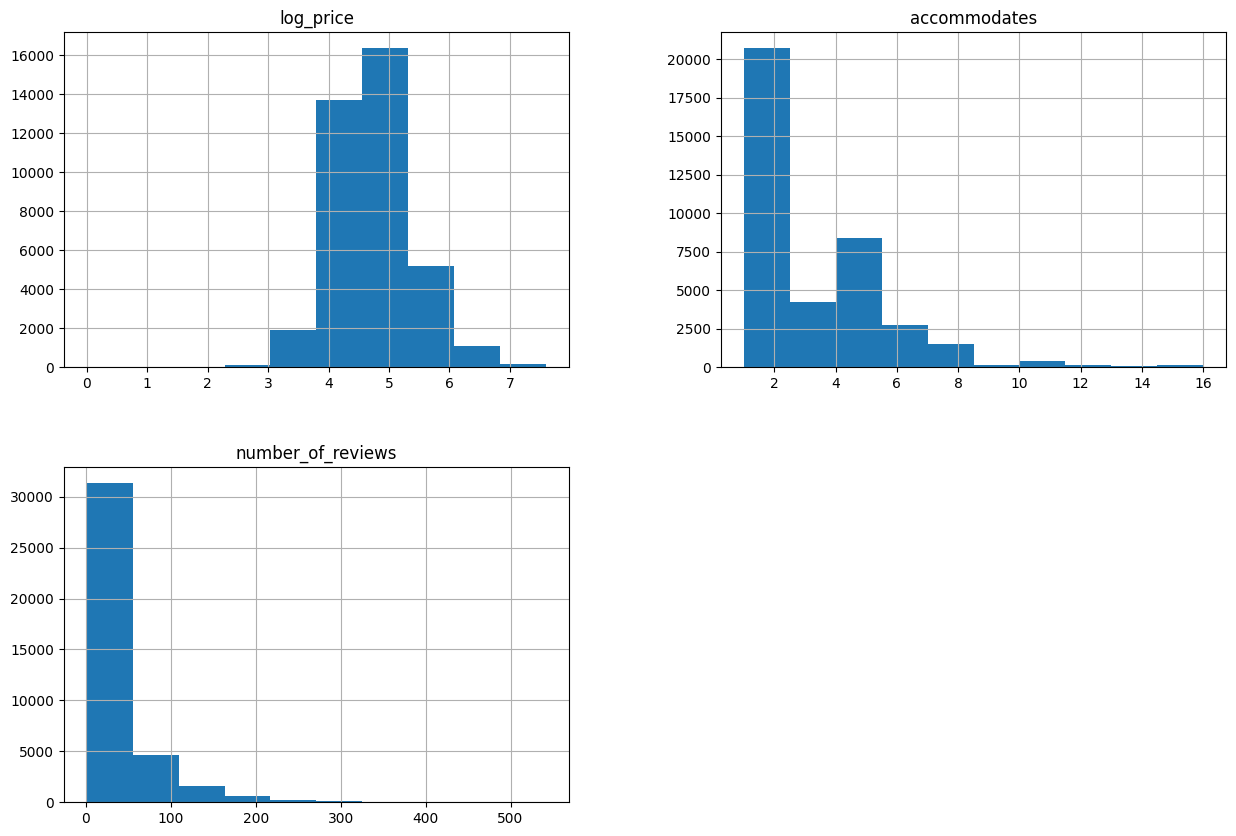

In [42]:
import matplotlib.pyplot as plt

# Preprocessing: convert categorical variables to categorical data type
df['room_type'] = df['room_type'].astype('category')
df['property_type'] = df['property_type'].astype('category')

# EDA: Distribution analysis for numerical features
numerical_features = ['log_price', 'accommodates', 'number_of_reviews']
df[numerical_features].hist(bins=10, figsize=(15, 10))
plt.show()

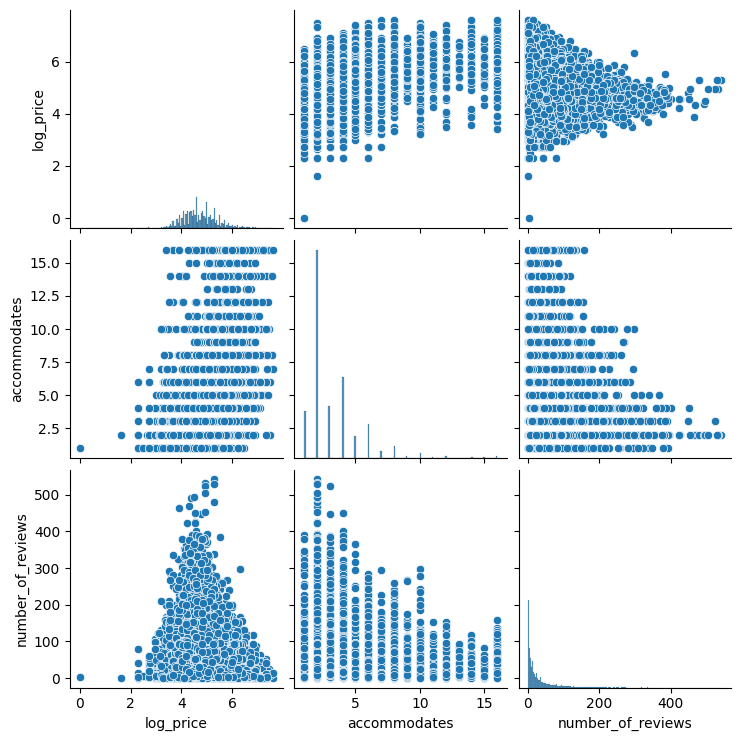

In [29]:
import seaborn as sns

# EDA: Visualize relationships between numerical features and log_price
sns.pairplot(df[numerical_features])
plt.show()

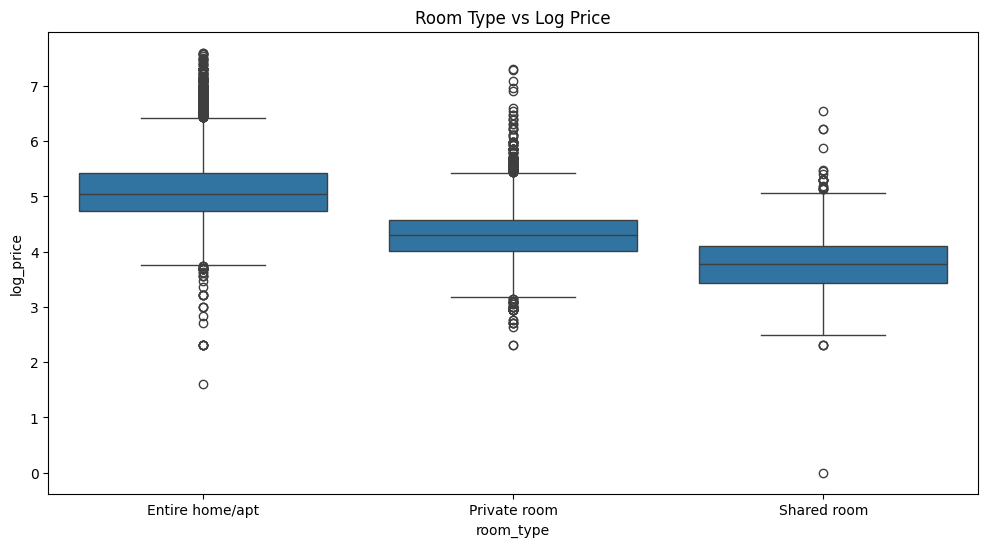

In [33]:
# Analyze relationships between log_price and categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Room Type vs Log Price')
plt.show()


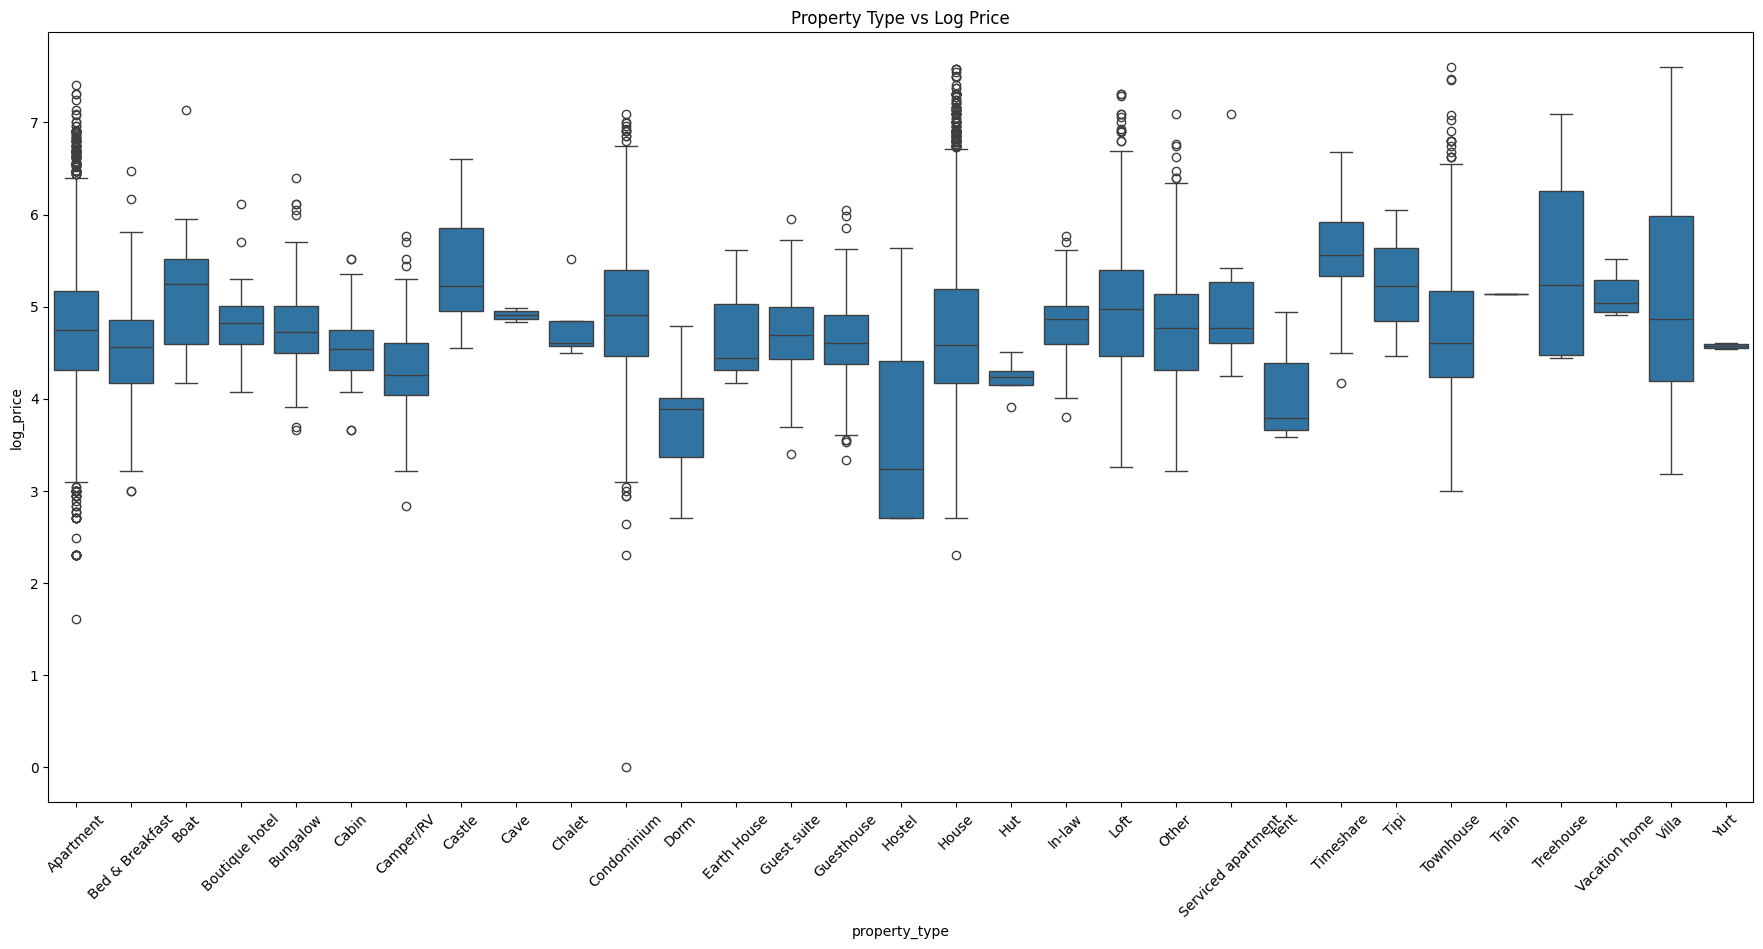

In [38]:
plt.figure(figsize=(22, 10))
sns.boxplot(x='property_type', y='log_price', data=df)
plt.title('Property Type vs Log Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-44-0baf03a82a52>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


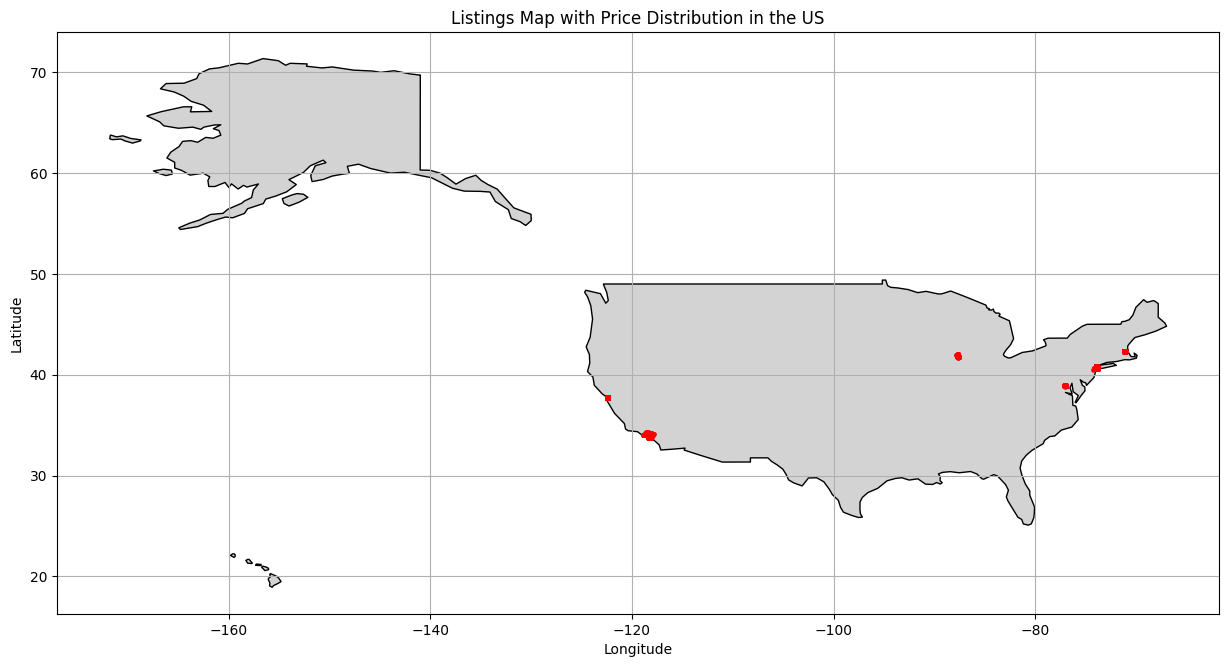

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming df is your DataFrame containing latitude, longitude, and price information

# Filter the dataset to include only listings within the US bounds
# Example bounds for the contiguous United States (you may need to adjust these bounds based on your dataset):
min_lon, max_lon = -125, -66.5  # Longitude range
min_lat, max_lat = 24, 49  # Latitude range
df_us = df[(df['longitude'] >= min_lon) & (df['longitude'] <= max_lon) &
           (df['latitude'] >= min_lat) & (df['latitude'] <= max_lat)]

# Plotting the listings on a map
us = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = us[(us['name'] == 'United States of America')]
gdf = gpd.GeoDataFrame(df_us, geometry=gpd.points_from_xy(df_us.longitude, df_us.latitude))

# Plot the US map
ax = us.plot(figsize=(15, 10), color='lightgrey', edgecolor='black')

# Plot the listings
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)

# Customize plot
plt.title('Listings Map with Price Distribution in the US')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show plot
plt.show()

In [51]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import nltk
nltk.download('punkt')

# Preprocessing
# Clean text (remove punctuation, convert to lowercase, etc.)
df['clean_description'] = df['description'].apply(lambda x: ' '.join(TextBlob(str(x)).words))

# Sentiment Analysis
# Use TextBlob to calculate sentiment scores
df['sentiment_score'] = df['clean_description'].apply(lambda x: TextBlob(x).sentiment.polarity)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mean Squared Error: 0.42436101989918185


In [52]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Days_Since_Last_Review,Amenities_Count,clean_description,sentiment_score
0,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6,2418,15,Enjoy travelling during your stay in Manhattan...,0.250000
1,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7,2427,19,The Oasis comes complete with a full backyard ...,0.246220
2,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,6,2436,10,Beautiful private room overlooking scenic view...,0.292143
3,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,10,2582,26,Arguably the best location and safest in downt...,0.157738
4,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,8,2417,21,Garden Studio with private entrance from the s...,0.288492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,7935934,4.110874,Villa,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",10,3.0,Real Bed,flexible,False,...,80.0,https://a0.muscache.com/im/pictures/27fea634-a...,91307,1.0,10.0,10,2683,22,The price is for room You will share the house...,0.207917
38498,11829011,5.135798,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,...,98.0,https://a0.muscache.com/im/pictures/9a99e2de-c...,94108,1.0,1.0,12,3098,24,CENTRALLY LOCATED Studio Unit in the WorldMark...,0.159683
38499,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,8,2579,16,Located on the Pacific Coast Highway this apar...,0.174256
38500,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,12,2431,31,A modern apartment located in East Williamsbur...,0.229167


In [62]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import ttest_ind

# Load the dataset
# Assuming df is your DataFrame containing 'amenities' and 'log_price' columns

# Parse amenities
mlb = MultiLabelBinarizer()
amenities_parsed = pd.DataFrame(mlb.fit_transform(df['amenities'].str.strip('{}').str.split(',')),
                                columns=mlb.classes_,
                                index=df.index)

# Merge parsed amenities with price data
df_merged = pd.concat([df[['log_price']], amenities_parsed], axis=1)

# Statistical Analysis
amenity_price_correlation = {}
for amenity in amenities_parsed.columns:
    # Perform t-test for each amenity
    high_price = df_merged[df_merged[amenity] == 1]['log_price']
    low_price = df_merged[df_merged[amenity] == 0]['log_price']
    t_stat, p_value = ttest_ind(high_price, low_price)
    amenity_price_correlation[amenity] = {'t_statistic': t_stat, 'p_value': p_value}

# Identify significant associations
significant_amenities = {amenity: stats for amenity, stats in amenity_price_correlation.items() if stats['p_value'] < 0.05}

# Visualization (Optional)
# You can visualize the associations using boxplots, scatter plots, or heatmaps

# Print significant associations
print("Significant Associations:")
for amenity, stats in significant_amenities.items():
    print(f"Amenity: {amenity}, T-Statistic: {stats['t_statistic']}, P-Value: {stats['p_value']}")


Significant Associations:
Amenity:  smooth pathway to front door", T-Statistic: 5.64440296237965, P-Value: 1.669190902868545e-08
Amenity: "24-hour check-in", T-Statistic: 29.798764912305753, P-Value: 6.349527981520649e-193
Amenity: "Air conditioning", T-Statistic: 6.137750932387381, P-Value: 8.45131860533478e-10
Amenity: "BBQ grill", T-Statistic: 10.313409556159357, P-Value: 6.604143886258552e-25
Amenity: "Baby bath", T-Statistic: 6.503618971200261, P-Value: 7.936902688639998e-11
Amenity: "Baby monitor", T-Statistic: 6.5540283431713835, P-Value: 5.671119185543499e-11
Amenity: "Babysitter recommendations", T-Statistic: 13.596907215245356, P-Value: 5.2241010640527196e-42
Amenity: "Bed linens", T-Statistic: 9.25901175913131, P-Value: 2.166430360108864e-20
Amenity: "Buzzer/wireless intercom", T-Statistic: 17.251240478603098, P-Value: 1.9483429245297e-66
Amenity: "Cable TV", T-Statistic: 49.827038313072705, P-Value: 0.0
Amenity: "Carbon monoxide detector", T-Statistic: 18.753864359422206, P

In [66]:
import pandas as pd

# Sample DataFrame with categorical variables: room_type, city, property_type


# Apply one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=['room_type', 'city', 'property_type'])

# Display the encoded DataFrame
print(df_encoded)

             id  log_price                                          amenities  \
0       6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
1       7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
2      12422935   4.442651  {TV,"Wireless Internet",Heating,"Smoke detecto...   
3      13971273   4.787492  {TV,"Cable TV","Wireless Internet","Wheelchair...   
4        180792   4.787492  {TV,"Cable TV","Wireless Internet","Pets live ...   
...         ...        ...                                                ...   
38497   7935934   4.110874  {TV,"Wireless Internet","Air conditioning",Kit...   
38498  11829011   5.135798  {TV,"Cable TV",Internet,"Wireless Internet","A...   
38499  13281809   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
38500  18688039   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
38501   3534845   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathro